# Data stories

<div><p>In the previous lesson, we learned a few design principles and created the visualization below:</p>
<p><img src="https://s3.amazonaws.com/dq-content/525/screen3_2.png" alt="img"></p>
<p>According to some, what we did is storytelling with data. However, is presenting the top 20 countries according to death toll really a story?</p>
<p>In a broad sense, a story is a sequence of events: something happens, then something else happens, and so on. Rather than events, our graph above presents facts.</p>
<p>Another story element is change: something or someone changes throughout the story. Our graph is static: the information we present doesn't show any element of change. </p>
<p>There's nothing wrong with showing facts or presenting static information, but that's not a story. To create a data story, we need to wrap those numerical facts into events that show change.</p>
<p>For our example above, we can take the particular case of the United States and show how the death toll has changed since the beginning of the pandemic. Below, we see an example of a data story:</p>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen1_1.png" alt="img"></p>
<p>This data story shows the evolution of the death toll in the United States. At the end of March, we see the death toll at 2,398 deaths, but in December, it became 295,406 — it has changed. Following the four line plots, we see a sequence of events that led to that change. For instance, a surge in the average number of daily deaths starting in April resulted in a large number of deaths at the end of June.</p>
<p>Note that if we break down the graph, this is still a lot of numerical facts. We've just assembled them into a sequence of events that are logically and temporally connected and create meaning together — a story.</p>
<p>Now, let's learn how to recreate the data story above using matplotlib.</p></div>

# Grid charts in `matplotlib`

<div><p>The data story visualization we showed on the previous screen is the result of using Matplotlib's object-oriented interface. The visualization is a grid chart composed of four different line plots — with a configuration of four rows by one column.</p>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen1_1.png" alt="img"></p>
<p>We'll learn how to recreate this graph throughout this lesson. We begin with creating a grid chart of four rows by one column using the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html" target="_blank"><code>plt.subplots()</code> function</a>. We also adjust the figure size to <code>(6, 8)</code> since we want to keep a mobile-friendly ratio.</p>
</div>

```
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen2_1.png" alt="img"></p>
<p>The function returns two objects: a <code>Figure</code> and an array of four <code>Axes</code> objects. We use <code>(ax1, ax2, ax3, ax4)</code> to assign each object within that array to a different variable.</p>
<p>To draw on the individual plots, we can use Matplotlib methods on each of the four <code>Axes</code> objects. Below, we draw a line plot on the first and the third plot.</p>
</div>

```
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
ax1.plot([2, 4, 8], [2, 8, 16])
ax3.plot([3, 9, 18], [16, 4, 16])
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen2_2.png" alt="img"></p>
<p>In the next exercise, we'll draw the four line plots that show the evolution of average daily deaths per month in 2020. We collected the data from the <a href="https://covid19.who.int/" target="_blank">World Health Organization</a> on December 15th, 2020. Below, we see the first five rows of the data:</p>
<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Month</th>
<th>New_deaths</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>1</td>
<td>0</td>
</tr>
<tr>
<th>1</th>
<td>2</td>
<td>0</td>
</tr>
<tr>
<th>2</th>
<td>3</td>
<td>77</td>
</tr>
<tr>
<th>3</th>
<td>4</td>
<td>1844</td>
</tr>
<tr>
<th>4</th>
<td>5</td>
<td>1448</td>
</tr>
</tbody>
</table>
<p>Let's see what the two columns mean:</p>
<ul>
<li><code>Month</code>: the month number.</li>
<li><code>New_Deaths</code>: the number of daily average deaths for each month. A value of 1,844 for April means that for each day of April, there were 1,844 deaths, on average.</li>
</ul>
<p>Let's read in the data set and draw the four line plots.</p></div>

### Instructions 

<ol>
<li>Read in the <code>covid_avg_deaths.csv</code> file into a pandas <code>DataFrame</code>, and assign the result to a variable named <code>death_toll</code>.</li>
<li>Create a grid chart of four rows by one column with a figure size of <code>(6, 8)</code>.</li>
<li>On each of the four plots, draw a line plot with the <code>Month</code> column on the x-axis and the <code>New_deaths</code> columns on the y-axis.</li>
</ol>

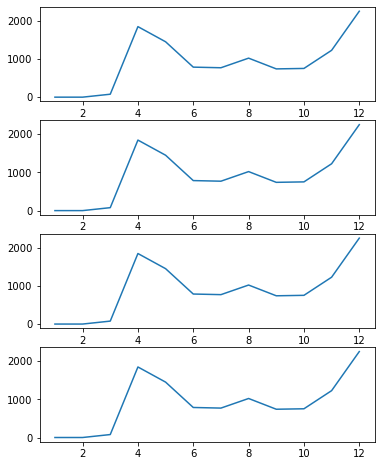

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

death_toll = pd.read_csv('covid_avg_deaths.csv')

fig, axs = plt.subplots(ncols=1, nrows=4, 
             figsize=(6, 8))
(ax1, ax2, ax3, ax4) = axs 
ax1.plot(death_toll['Month'], death_toll['New_deaths'])
ax2.plot(death_toll['Month'], death_toll['New_deaths'])
ax3.plot(death_toll['Month'], death_toll['New_deaths'])
ax4.plot(death_toll['Month'], death_toll['New_deaths'])
plt.show()

# Faster workflow 

<div><p>In the previous exercise, we created our grid chart using this code:</p>
</div>

```
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
ax1.plot(death_toll['Month'], death_toll['New_deaths'])
ax2.plot(death_toll['Month'], death_toll['New_deaths'])
ax3.plot(death_toll['Month'], death_toll['New_deaths'])
ax4.plot(death_toll['Month'], death_toll['New_deaths'])
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen3_1.png" alt="img"></p>
<p>Since we draw the same plot on each of the four <code>Axes</code> objects, we can simplify our work using a <code>for</code> loop. First, we group the four <code>Axes</code> objects into a Python <code>list</code>, and then we iterate over that list:</p>
</div>

```
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen3_1.png" alt="img"></p>
<p>We can also use the loop to apply a change to all <code>Axes</code> objects. Below, for instance, we remove the y- and x-tick labels for all plots:</p>
</div>

```
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen3_2.png" alt="img"></p>
<p>In the spirit of maximizing the data-ink ratio, let's also remove the ticks and the spines (the x- and y-axes).</p></div>

### Instructions 

<p>Iterate over a list containing the four <code>Axes</code> objects. For each <code>Axes</code> object, do the following:</p>
<ol>
<li>Generate a line plot with the <code>Month</code> column on the x-axis and the <code>New_deaths</code> columns on the y-axis.</li>
<li>Remove the x- and y-tick labels.</li>
<li>Remove all ticks using the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html" target="_blank"><code>Axes.tick_params()</code> method</a>.</li>
<li>Remove all the spines using the <a href="https://matplotlib.org/stable/api/spines_api#matplotlib.spines.Spines" target="_blank"><code>Axes.spines[location].set_visible()</code> method</a>.</li>
</ol>

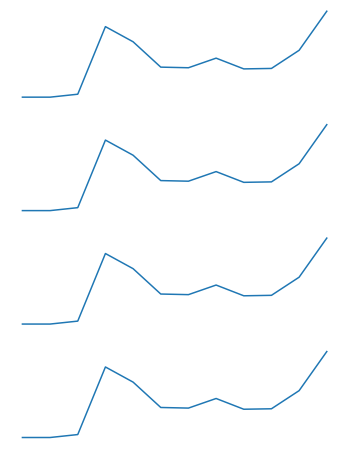

In [2]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes: 
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False)
    spine_locations = ['top', 'bottom', 'left', 'right']
    for sp_loc in spine_locations:    
        ax.spines[sp_loc].set_visible(False)
plt.show()

# Modifying line plots 

<div><p>The storytelling data visualization we first showed emphasizes four periods:</p>
<ul>
<li>January–March</li>
<li>March–June</li>
<li>June–October</li>
<li>October–December</li>
</ul>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen1_1.png" alt="img"></p>
<p>To highlight these four periods, we begin by coloring all plots in a shade of red. Then, we increase their transparency by using the <code>alpha</code> parameter.</p>
</div>

```
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)

    # Assume the rest of the code is written
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen4_1.png" alt="img"></p>
<p>Now, we draw separate line plots on top of the current ones. We begin by drawing the first one — we use the same color and increase the line width using the <code>linewidth</code> parameter.</p>
</div>

```
# Assume the rest of the code is written 
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen4_2.png" alt="img"></p>
<p>Notice that above we used <code>ax1</code> in <code>ax1.plot()</code>, not just <code>ax</code>. We take the same approach for <code>ax2</code>.</p>
</div>

```
# Assume the rest of the code is written 
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen4_3.png" alt="img"></p>
<p>Matplotlib can be very powerful if you're a little imaginative. You'll often want to make a specific change and search for a function that will specifically handle that change. This approach won't always work because the function you want may not exist.</p>
<p>However, it'll often be possible to get what you want by combining what Matplotlib already has. To do that, identify the basic parts of what you want to create. Then, try to create those basic parts using Matplotlib.</p>
<p>Let's now highlight the last two periods: June–October and October–December. We've already added the code for the first two.</p></div>

### Instructions

<ol>
<li>Highlight the June–October period on the third plot. Use <code>color='#af0b1e'</code> and <code>linewidth=2.5</code>.</li>
<li>Highlight the October–December period on the fourth plot. Use <code>color='#af0b1e'</code> and <code>linewidth=2.5</code>.</li>
</ol>

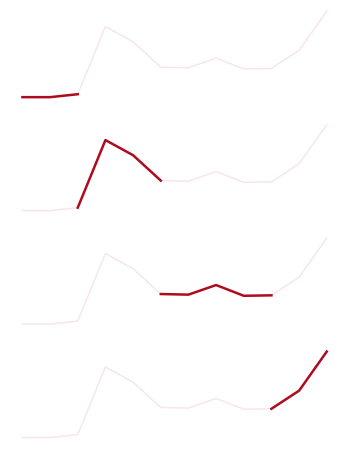

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)

plt.show()

# Adding structural elements 

<div><p>Right now, our graph has a very high data-ink ratio, which is good. Except for the four highlighted periods, we can't remove anything without losing important data.</p>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen5_1.png" alt="img"></p>
<p>However, we still need to add a few structural elements so the audience can understand the visualization.</p>
<p>First, we're going to show the quantities by adding three labels on the first plot — we do this using the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html" target="_blank"><code>Axis.text()</code> method</a>. We arrived at the exact x- and y-coordinates you see below through a process of trial and error.</p>
</div>

```
# Assume the rest of the code is written
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen5_2.png" alt="img"></p>
<p>The three labels give the audience a sense of the magnitude and the range of the quantities. We only want to show people a trend, so these three labels are enough. The other three plots are identical, so we don't need to add more ink.</p>
<p>However, if our purpose were to show all quantities, adding only three labels wouldn't be enough. One solution is to show readers a separate table rather than decreasing the data-ink ratio with extra labels.</p>
<p>The three labels we added correspond to the quantities on the y-axis (the average number of daily deaths per month). On the x-axis, we have month names, and we need to make that clear.</p>
<p>Below, we add the 'Jan-Mar' label using <code>Axes.text()</code>. Specifically, notice the <code>rotation</code> parameter we use to slightly rotate the text.</p>
</div>

```
# Assume the rest of the code is written
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen5_3.png" alt="img"></p>
<p>Let's now add labels for the other three periods. We've already added the code for the first period and for the quantity labels.</p></div>

### Instructions 

<ol>
<li>
<p>Add the label <code>Mar - Jun</code> to the second <code>Axes</code> object. The label must have the following properties:</p>
<ul>
<li>The x-coordinate is <code>3.7</code>.</li>
<li>The y-coordinate is <code>800</code>.</li>
<li>The color is <code>#af0b1e</code>.</li>
<li>It is bolded.</li>
</ul>
</li>
<li>
<p>Add the label <code>Jun - Oct</code> to the third <code>Axes</code> object. The label must have the following properties:</p>
<ul>
<li>The x-coordinate is <code>7.1</code>.</li>
<li>The y-coordinate is <code>500</code>.</li>
<li>The color is <code>#af0b1e</code>.</li>
<li>It is bolded.</li>
</ul>
</li>
<li>
<p>Add the label <code>Oct - Dec</code> to the fourth <code>Axes</code> object. The label must have the following properties:</p>
<ul>
<li>The x-coordinate is <code>10.5</code>.</li>
<li>The y-coordinate is <code>600</code>.</li>
<li>The color is <code>#af0b1e</code>.</li>
<li>It is bolded.</li>
<li>It is rotated to <code>45</code> degrees.</li>
</ul>
</li>
</ol>

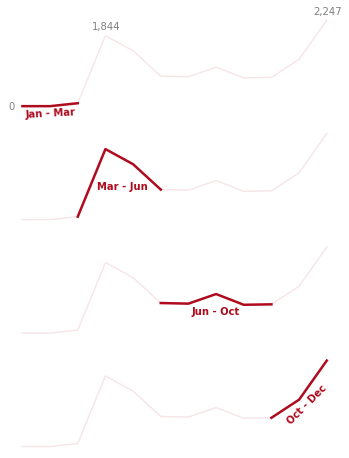

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)

ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e',
         weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e',
         weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e',
         weight='bold', rotation=45)

plt.show()

# Title and subtitle

<div><p>Our visualization is still not readable enough. Readers see four identical plots, a few quantities, and four distinct periods. However, they can't tell what the quantities mean.</p>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen6_1.png" alt="img"></p>
<p>We'll use the subtitle to inform readers about what the quantities describe. Recall from our last lesson that we should use the title to show more data.</p>
<p>Let's add a title and a subtitle in the next exercise.</p></div>

### Instructions 

<ol>
<li>
<p>Add the title <code>The virus kills 851 people each day</code> to the first <code>Axes</code> object (data source: <a href="https://covid19.who.int/" target="_blank">World Health Organization</a>). The text must have the following properties:</p>
<ul>
<li>The x-coordinate is <code>0.5</code>.</li>
<li>The y-coordinate is <code>3500</code>.</li>
<li>The font size is <code>14</code>.</li>
<li>It is bolded.</li>
</ul>
</li>
<li>
<p>Add the subtitle <code>Average number of daily deaths per month in the US</code>. The text must have the following properties:</p>
<ul>
<li>The x-coordinate is <code>0.5</code>.</li>
<li>The y-coordinate is <code>3150</code>.</li>
<li>The font size is <code>12</code>.</li>
</ul>
</li>
</ol>

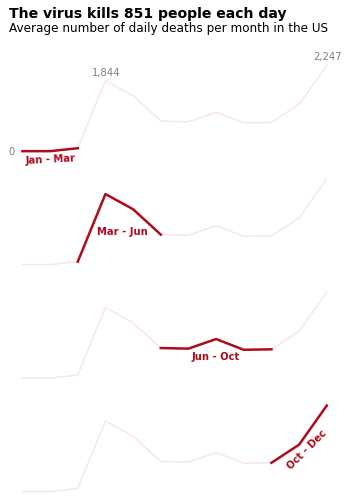

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')

ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')

ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)

ax1.text(0.5, 3500, s='The virus kills 851 people each day', 
         size=14, weight='bold')
ax1.text(0.5, 3150, 
         s='Average number of daily deaths per month in the US',
         size=12)

plt.show()

# Adding a progress bar 

<div><p>The last thing we're going to add to our visualization is a progress bar. At the beginning of the lesson, we saw the complete graph with four progress bars showing the cumulative death toll.</p>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen1_1.png" alt="img"></p>
<p>The progress bars follow the change in the total number of cumulative deaths over the four highlighted periods. They represent a detailed breakdown of the death toll in the United States. Assuming our audience has already seen the graph below, we don't need to explain the progress bar.</p>
<p><img src="https://s3.amazonaws.com/dq-content/525/screen3_2.png" alt="img"></p>
<p>We don't have a Matplotlib function specifically built for creating progress bars. Our approach, however, is to do the following:</p>
<ol>
<li>Determine the basic parts of a progress bar.</li>
<li>Use Matplotlib to create those parts.</li>
</ol>
<p>A progress bar is made of two rectangles. The rectangles are different colors, and the one with a darker shade is put on top of the other — this creates a visual sense of progress.</p>
<p>To create a rectangle in Matplotlib, we can draw a thick horizontal line. To draw a horizontal line, we can use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html" target="_blank"><code>Axes.axhline()</code> method</a>. The <code>y</code> parameter specifies the y-coordinate of the horizontal line.</p>
</div>

```
# Assume the rest of the code is written
ax1.axhline(y=1600)
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen7_1.png" alt="img"></p>
<p>Now that we have drawn a horizontal line, we need to do the following:</p>
<ul>
<li>Make the line shorter — we control the line's length using <code>xmin</code> and <code>xmax</code> parameters.</li>
<li>Increase the line's width to make it look like a rectangle — we use the <code>linewidth</code> parameter.</li>
<li>Change the color to <code>'#af0b1e'</code> and increase its transparency — we use the <code>color</code> and <code>alpha</code> parameters.</li>
</ul>
</div>

```
# Assume the rest of the code is written
ax1.axhline(y=1600, xmin=0.5, xmax=0.8,
           linewidth=6, color='#af0b1e', alpha=0.1)
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen7_2.png" alt="img"></p>
<p>Now let's draw this line on all four plots.</p></div>

### Instructions 

<ol>
<li>Add a horizontal line for all four plots. The line must have the following properties:<ul>
<li>The y-coordinate is <code>1600</code>.</li>
<li>Its length is determined by <code>xmin=0.5</code> and <code>xmax=0.8</code>.</li>
<li>Its width is <code>6</code>.</li>
<li>The color is <code>#af0b1e</code> and is transparent with an <code>alpha</code> of <code>0.1</code>.</li>
</ul>
</li>
</ol>

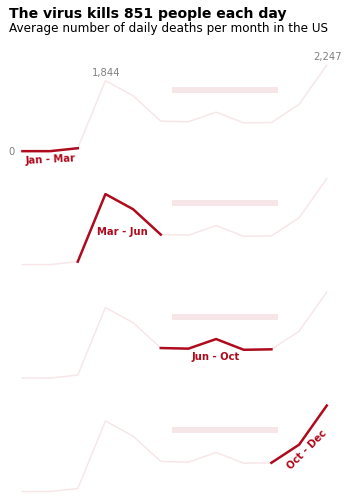

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
    
    ax.axhline(y=1600, xmin=0.5, xmax=0.8, 
               linewidth=6, 
               color='#af0b1e', alpha=0.1)
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')

ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')

ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)

plt.show()

# Completing the progress bar 

<div><p>In the previous exercise, we added a horizontal line to each plot. For each line, we now need to add a new line on top of each to create a visual sense of progress.</p>
<p>In the <code>for</code> loop below, we add a new horizontal line to each plot:</p>
</div>

```
# Assume the rest of the code is written
for ax in axes:
    # First line
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e', alpha=0.1)

    # Second line
    ax.axhline(y=1600, xmin=0.5, xmax=0.65,
               linewidth=6, color='#af0b1e')
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen8_1.png" alt="img"></p>
<p>The progress bars all indicate the same quantity, so we need to modify them as a function of the cumulative number of deaths. Inside the code block below, we see three lists:</p>
<ul>
<li><code>deaths</code>: the number of cumulative deaths at the end of March, June, October, and December (note: we collected the December data on December 15th).</li>
<li><code>proportions</code>: the proportion of deaths for each of those months relative to the current death toll (December 15th).</li>
<li><code>xmax_vals</code>: the values we'll need to use for the <code>xmax</code> parameter of <code>Axes.axhline()</code> to control its length. We multiplied each proportion by <code>0.3</code> because <code>xmax - xmin = 0.8 - 0.5 = 0.3</code>.</li>
</ul>
</div>

```
deaths = [2398, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]
print(proportions)
print(xmax_vals)
```
```
[0.01, 0.43, 0.77, 1.0]
[0.503, 0.629, 0.731, 0.8]
```

<div>
<p>Using this data, we can now adjust the progress bars:</p>
</div>

```
# Assume the rest of the code is written
for ax, xmax in zip(axes, xmax_vals):
    # First line
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e', alpha=0.1)

    # Second line
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/526/screen8_2.png" alt="img"></p>
<p>Now let's add the text above the progress bars. For the exercise, we've already added the lists <code>deaths</code>, <code>proportions</code>, and <code>xmax_vals</code>. We've also created this <code>for</code> loop, which you'll need to complete in the following exercise.</p>
</div>


```
for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e',
               alpha=0.1)
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
    # You'll complete from here
```

### Instructions 

<ol>
<li>Copy the code block above, and paste it into your code.</li>
<li>Inside the <code>for</code> loop you copied, call a Matplotlib method to add the text representing the cumulative number of deaths above each progress bar. The text must have the following properties:<ul>
<li>The x-coordinate is <code>7.5</code>.</li>
<li>The y-coordinate is <code>1850</code>.</li>
<li>The color is <code>#af0b1e</code>.</li>
<li>It's bolded.</li>
<li>Each number has a comma as a thousands separator. You can use the <a href="https://docs.python.org/3/library/functions.html#format" target="_blank"><code>format()</code> function</a> to simplify your work. For instance, <code>format(5000, ',')</code> outputs the string <code>'5,000'</code>.</li>
</ul>
</li>
</ol>

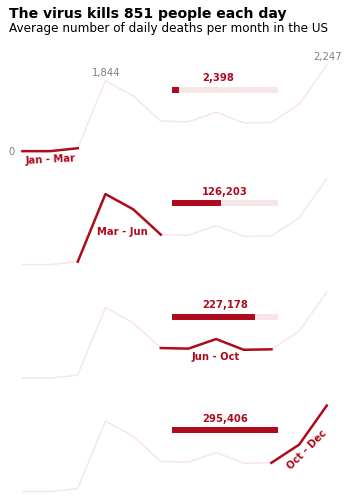

In [9]:
death_toll = pd.read_csv('covid_avg_deaths.csv')
deaths = [2398, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')


ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')


ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)

for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e',
               alpha=0.1)
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
    # You'll complete from here
    ax.text(7.5, 1850, 
            color='#af0b1e', weight='bold',
            s=format(death, ','))

plt.show()